## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- ### 1) Problem statement
- This project aims to comprehensively analyze the influence of socio-demographic factors on students' academic performance, with a particular focus on standardized test scores. By examining variables such as Gender, Ethnicity, Parental Level of Education, Lunch (as an indicator of socio-economic status), and Participation in Test Preparation Courses, the project seeks to identify and understand the complex interplay between these factors and educational outcomes. This analysis is crucial for developing targeted interventions that can mitigate the adverse effects of these variables on student performance, thereby promoting educational equity and improving overall academic success in diverse student populations.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [27]:
# Import packages
# Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For Displaying all columns
pd.set_option('display.max_columns',None)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [28]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [30]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical statistics we can see all means are very close to each other - between 66 and 69;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [34]:
#define numerical and categorical features 
numerica_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

#print the no of features
print(f"We have {len(numerica_features)} numerical features: {numerica_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [43]:
#total scores 
df['total score'] = df['math_score']+df['reading_score']+df['writing_score']

#Average scores
df['average'] = df['total score']/3
df[['total score','average']].head()

,total score,average
0,218,72.666667
1,247,82.333333
2,278,92.666667
3,148,49.333333
4,229,76.333333


In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [45]:
#students who score full marks in any of the 3 formats

reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [46]:
#students who score less than 20 marks in any of the 3 formats

reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is observed to be in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

Text(0.5, 1.0, 'Boxplot of average')

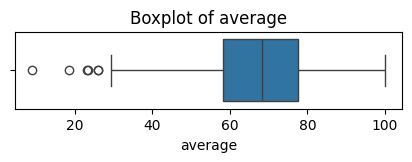

In [47]:
# lets understand range of bins for historgram for average
plt.figure(figsize =(5,1))
sns.boxplot(data= df, x='average')
plt.title('Boxplot of average')

The boxplot shows the distribution of students' average marks, with the median around 60, quartiles extending from approximately 58 to 78, and several lower outliers indicating unusually low scores.
we can basically assign bins size of 80-60 = 20 around 20 so lets go by 30 for now.

Text(0.5, 1.0, 'Boxplot of total score')

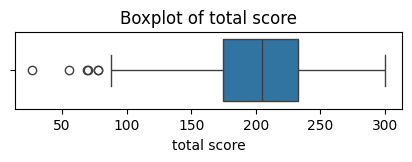

In [54]:
# lets understand range of bins for historgram for total score
plt.figure(figsize =(5,1))
sns.boxplot(data= df, x='total score')
plt.title('Boxplot of total score')

#### 4.1.1 Histogram & KDE

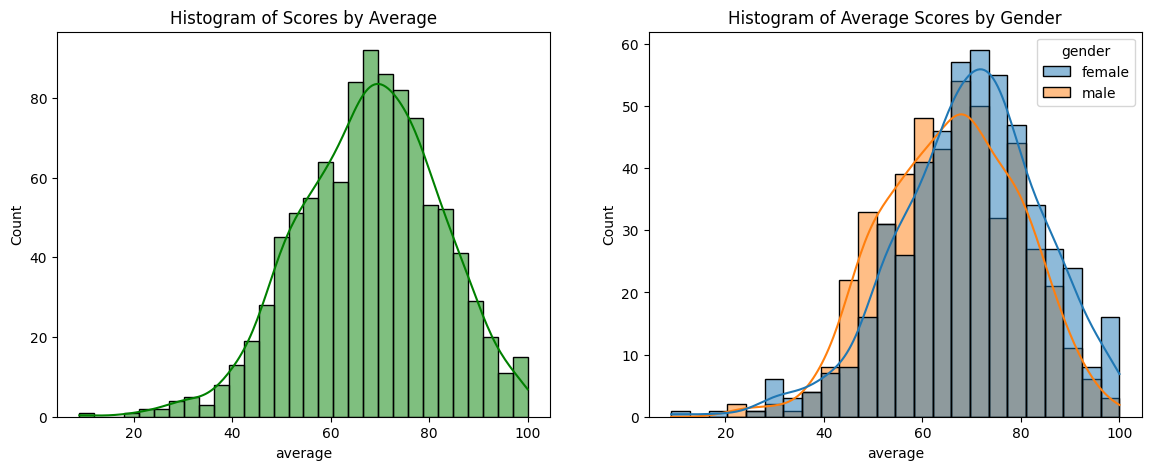

In [61]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.histplot(data = df,x='average', bins=30,kde= True, ax= ax[0],color='g')
ax[0].set_title("Histogram of Scores by Average")
sns.histplot(data= df,x='average',kde=True, hue='gender',ax=ax[1])
ax[1].set_title("Histogram of Average Scores by Gender")
plt.show()

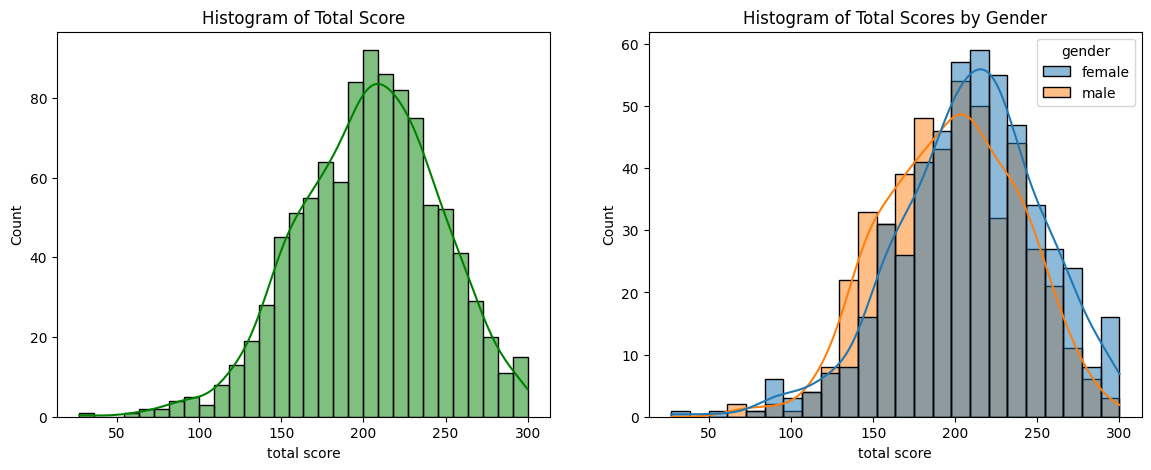

In [62]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.histplot(data = df,x='total score', bins=30,kde= True, ax= ax[0],color='g')
ax[0].set_title("Histogram of Total Score")
sns.histplot(data= df,x='total score',kde=True, hue='gender',ax=ax[1])
ax[1].set_title("Histogram of Total Scores by Gender")
plt.show()

#####  Insights
- Female students tend to perform well then male students.

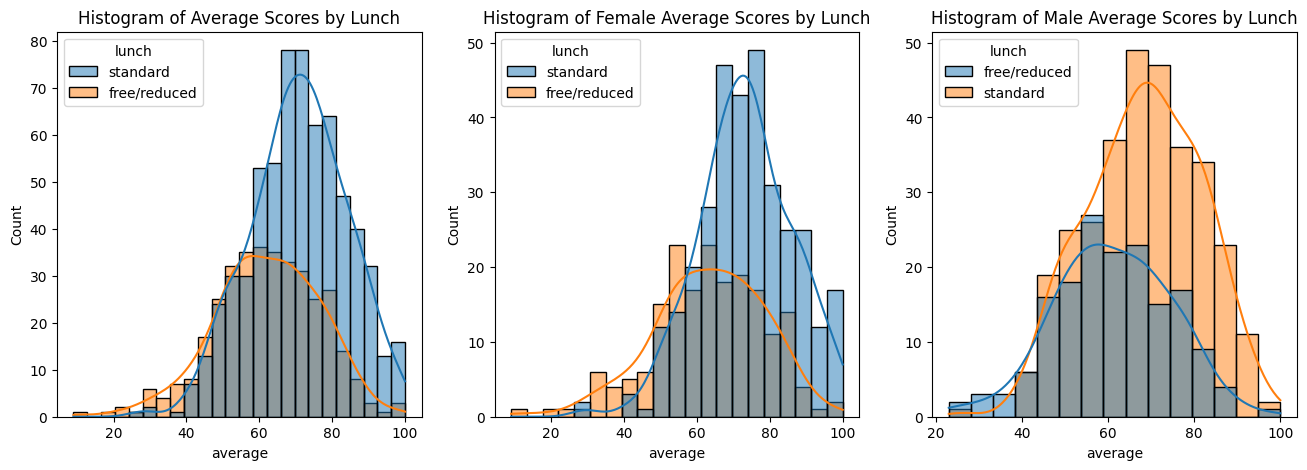

In [63]:
fig,ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data = df,x='average',hue='lunch',kde= True, ax= ax[0])
ax[0].set_title("Histogram of Average Scores by Lunch")
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', ax=ax[1])
ax[1].set_title("Histogram of Female Average Scores by Lunch")
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', ax=ax[2])
ax[2].set_title("Histogram of Male Average Scores by Lunch")
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

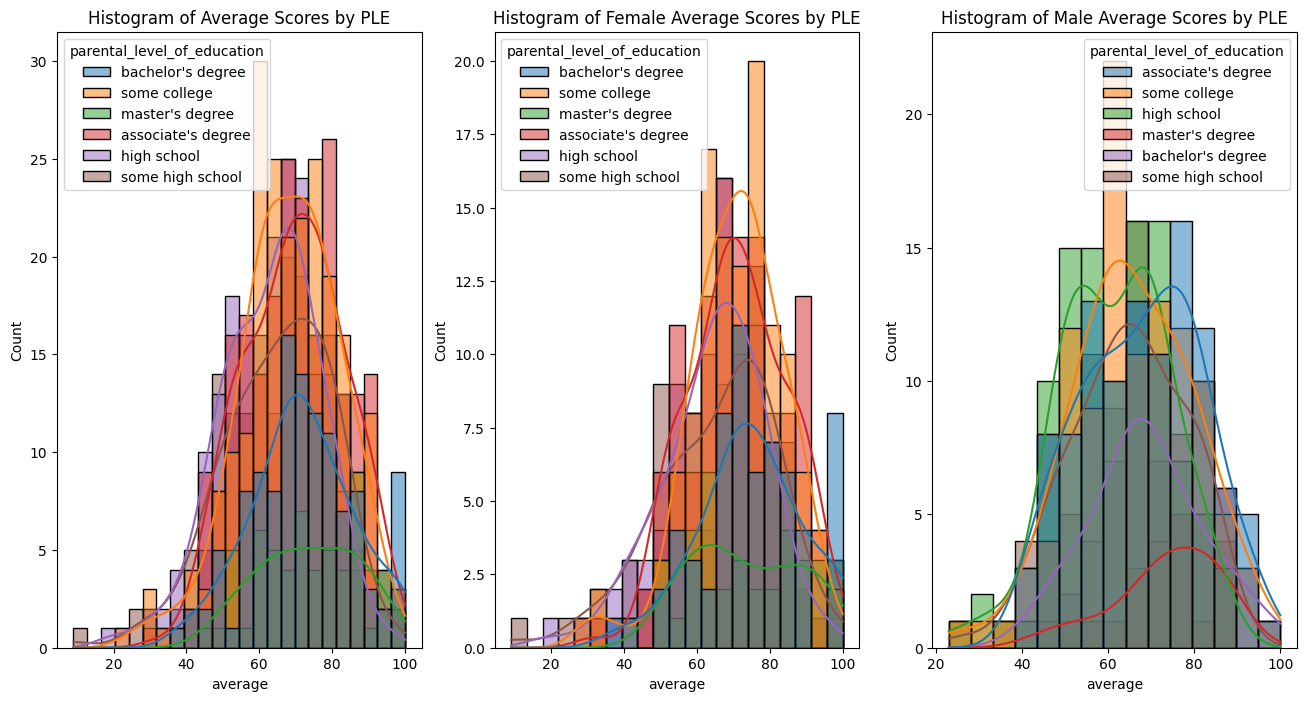

In [64]:
fig,ax = plt.subplots(1,3,figsize=(16,8))
sns.histplot(data = df,x='average',hue='parental_level_of_education',kde= True, ax= ax[0])
ax[0].set_title("Histogram of Average Scores by PLE")
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education', ax=ax[1])
ax[1].set_title("Histogram of Female Average Scores by PLE")
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education', ax=ax[2])
ax[2].set_title("Histogram of Male Average Scores by PLE")
plt.show()

#####  Insights
- The histograms show that students' scores vary with their parents' education level. Generally, higher parental education is linked to higher scores(bar in blue), particularly in the 80-100 range. 
- There's also a noticeable difference between genders, with boys showing more variation in scores than girls, especially among those whose parents had some high school or an associate's degree.

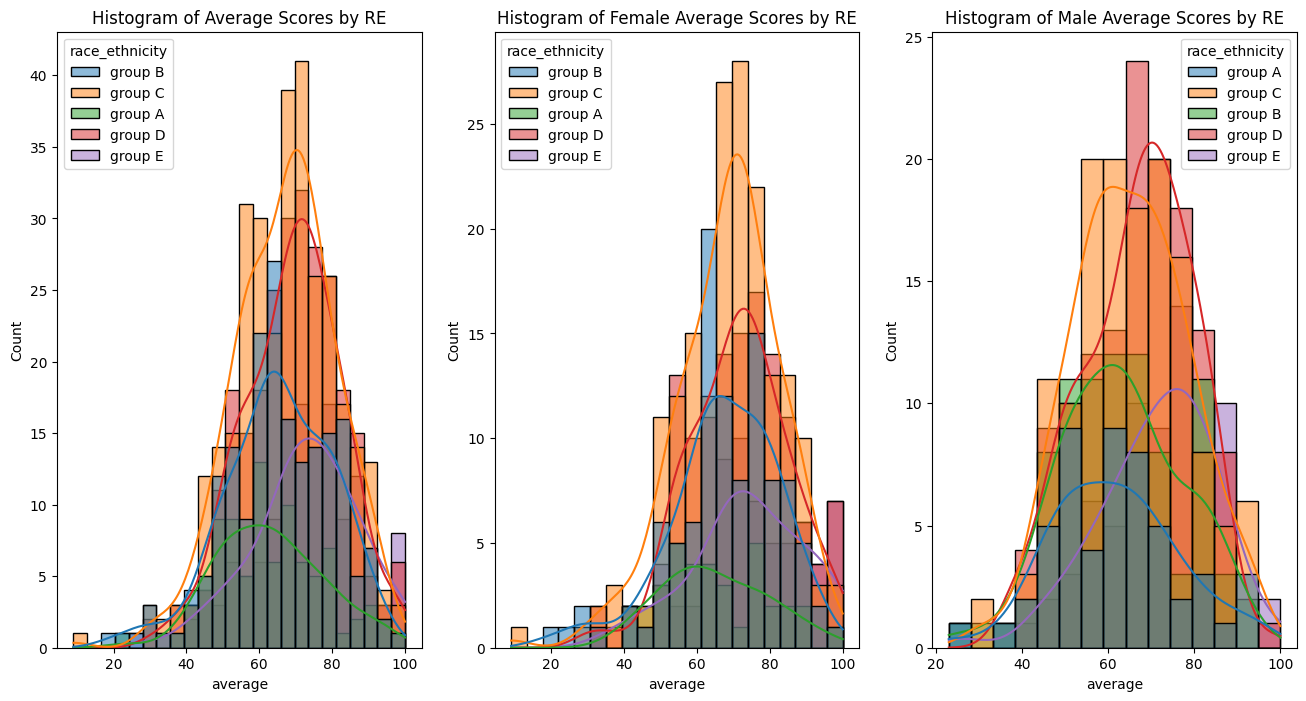

In [65]:
fig,ax = plt.subplots(1,3,figsize=(16,8))
sns.histplot(data = df,x='average',hue='race_ethnicity',kde= True, ax= ax[0])
ax[0].set_title("Histogram of Average Scores by RE")
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity', ax=ax[1])
ax[1].set_title("Histogram of Female Average Scores by RE")
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity', ax=ax[2])
ax[2].set_title("Histogram of Male Average Scores by RE")
plt.show()

#####  Insights
- Score Trends: Scores generally cluster around the middle for all groups, suggesting most students perform in a moderate range, with top scores being less common.
- Variations by Gender: Women generally show more consistent scoring across ethnic groups, while men's scores tend to spread out more, suggesting greater variability in their performance.
- Ethnic Insights: Some ethnic groups, particularly Group E, consistently show higher performance across all students, pointing to potential strengths or advantages in how they are achieving in educational settings.

#### 4.2 Maximumum score of students in all three subjects

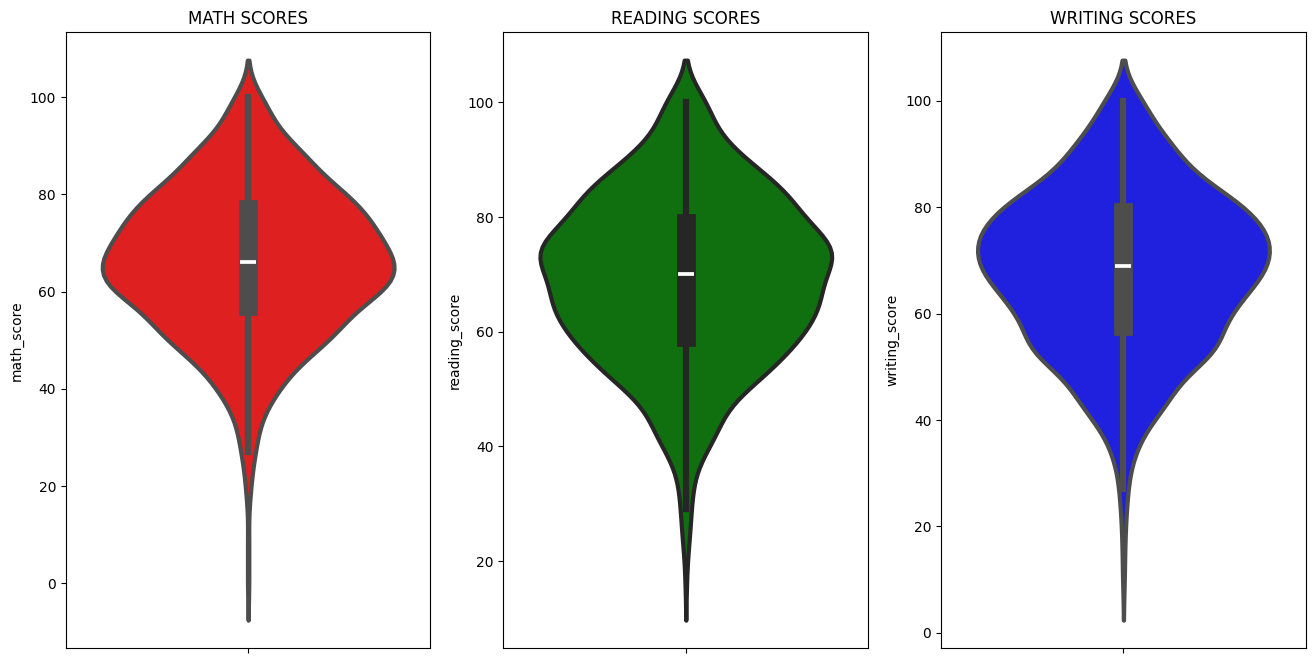

In [66]:
fig,ax = plt.subplots(1,3,figsize=(16,8))
sns.violinplot(data=df,y='math_score', color='red',linewidth=3, ax=ax[0])
ax[0].set_title('MATH SCORES')
sns.violinplot(data=df,y='reading_score', color='green',linewidth=3, ax=ax[1])
ax[1].set_title('READING SCORES')
sns.violinplot(data=df,y='writing_score', color='blue',linewidth=3, ax=ax[2])
ax[2].set_title('WRITING SCORES')
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

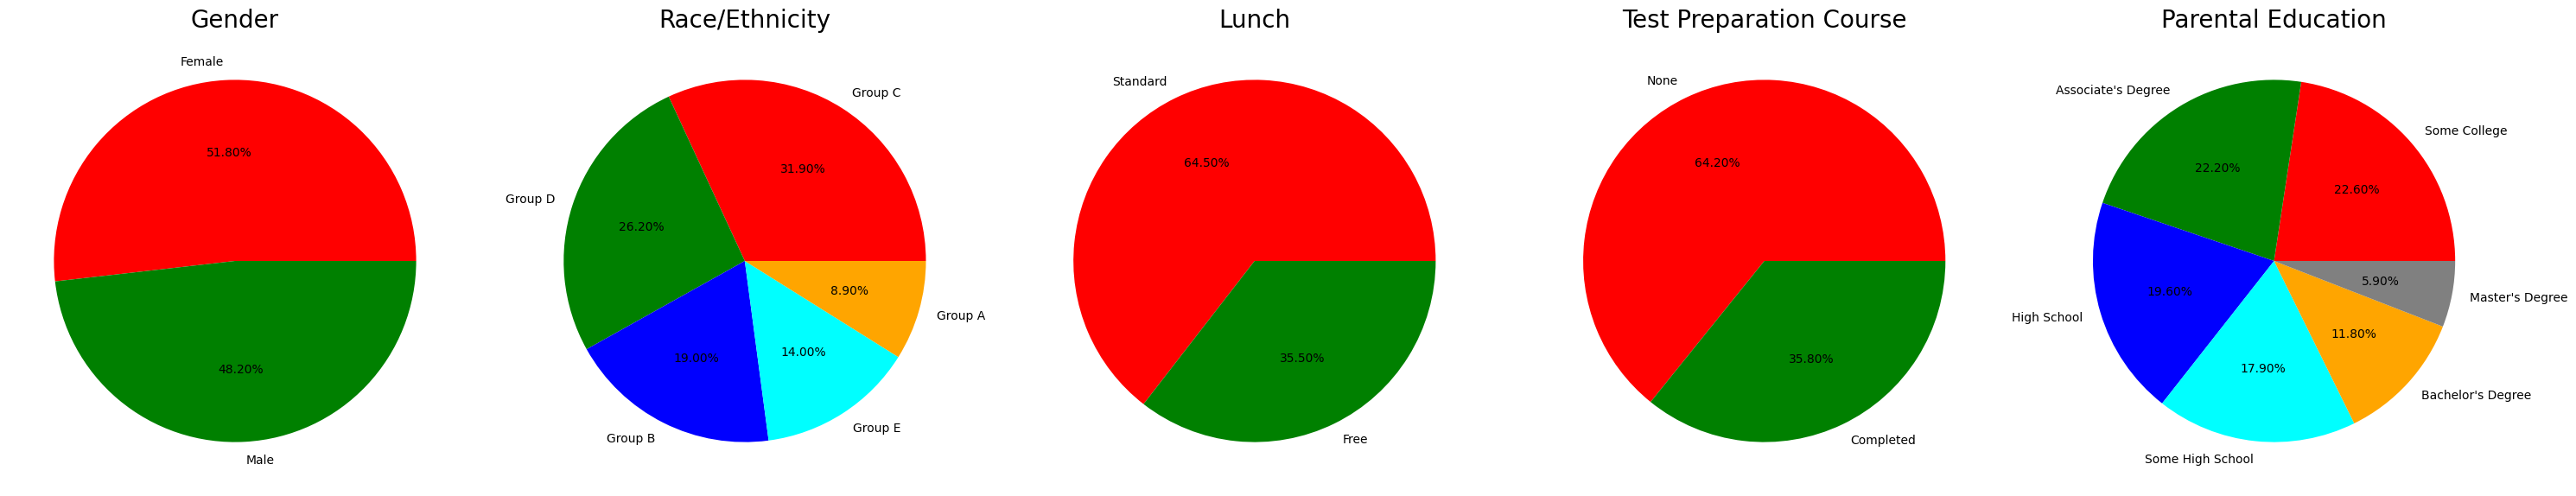

In [67]:
# Define the figure and subplots
fig, ax = plt.subplots(1, 5, figsize=(30, 12))

# Gender pie chart
ax[0].pie(df['gender'].value_counts(), colors=['red', 'green'], labels=['Female', 'Male'], autopct='%.2f%%')
ax[0].set_title('Gender', fontsize=20)
ax[0].axis('off')

# Race/Ethnicity pie chart
ax[1].pie(df['race_ethnicity'].value_counts(), colors=['red', 'green', 'blue', 'cyan', 'orange'],
          labels=['Group C', 'Group D', 'Group B', 'Group E', 'Group A'], autopct='%.2f%%')
ax[1].set_title('Race/Ethnicity', fontsize=20)
ax[1].axis('off')

# Lunch pie chart
ax[2].pie(df['lunch'].value_counts(), colors=['red', 'green'], labels=['Standard', 'Free'], autopct='%.2f%%')
ax[2].set_title('Lunch', fontsize=20)
ax[2].axis('off')

# Test Preparation Course pie chart
ax[3].pie(df['test_preparation_course'].value_counts(), colors=['red', 'green'], labels=['None', 'Completed'], autopct='%.2f%%')
ax[3].set_title('Test Preparation Course', fontsize=20)
ax[3].axis('off')

# Parental Level of Education pie chart
ax[4].pie(df['parental_level_of_education'].value_counts(), colors=['red', 'green', 'blue', 'cyan', 'orange', 'grey'],
          labels=['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"], autopct='%.2f%%')
ax[4].set_title('Parental Education', fontsize=20)
ax[4].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

([<matplotlib.patches.Wedge at 0x1201aeaeb70>,
 [Text(-0.062170487413935493, 1.0982416994881927, 'Male'),
  Text(0.06782216900078375, -1.1980818642279956, 'Female')],
 [Text(-0.03391117495305572, 0.5990409269935596, '51.8%'),
  Text(0.039562931917123845, -0.6988810874663307, '48.2%')])

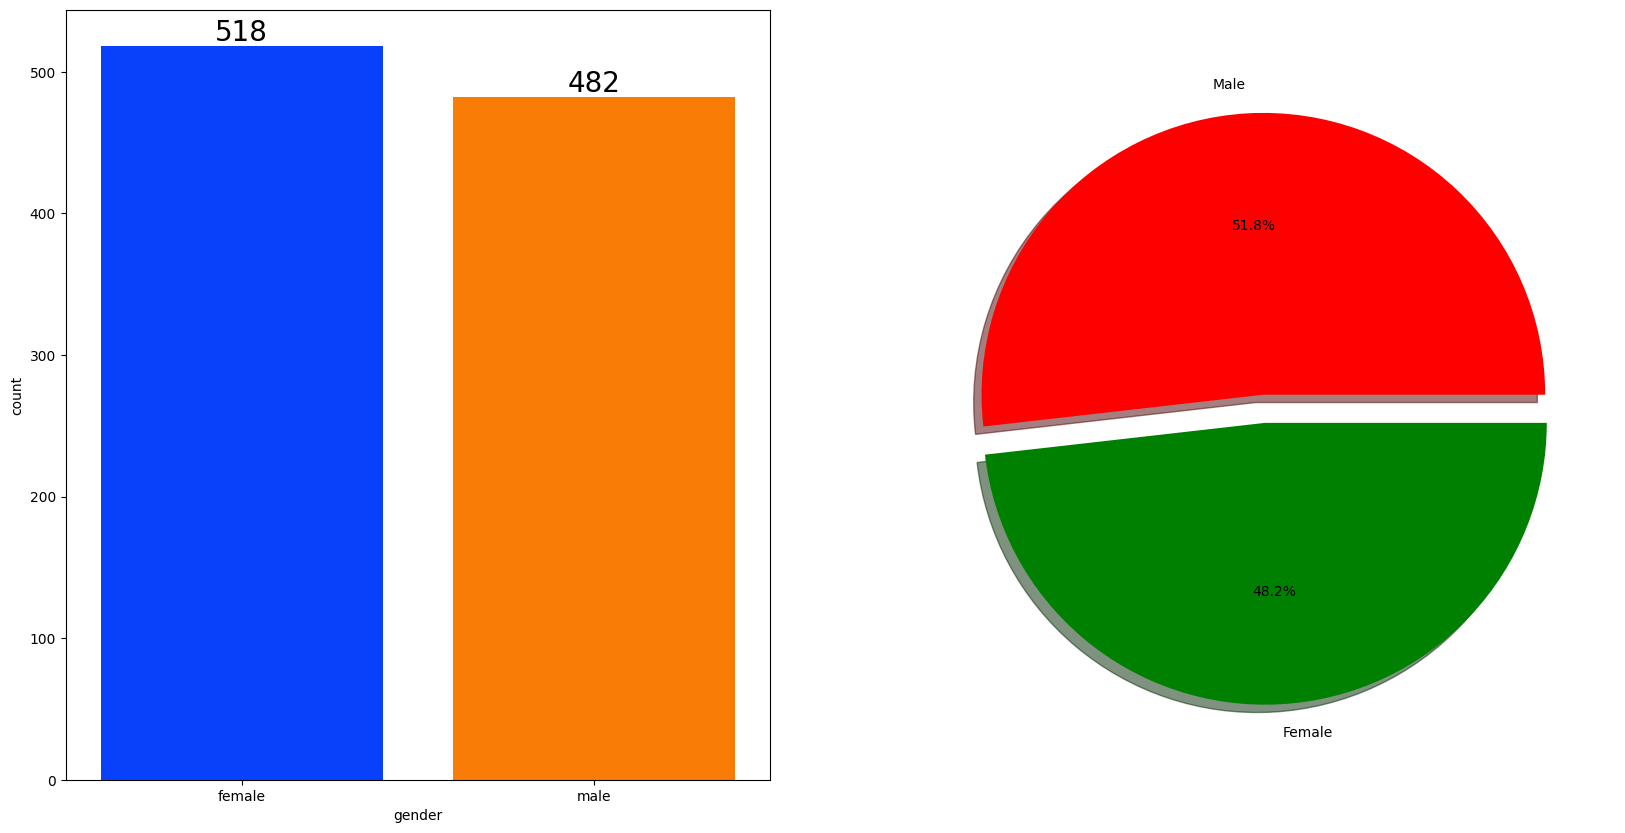

In [68]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df, x='gender',palette='bright',saturation=0.95,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1]\
        , autopct='%1.1f%%',shadow=True,colors =['red','green'])

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Does gender have any impact on student's performance ? ) 

In [77]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average score', 'average'],
      dtype='object')

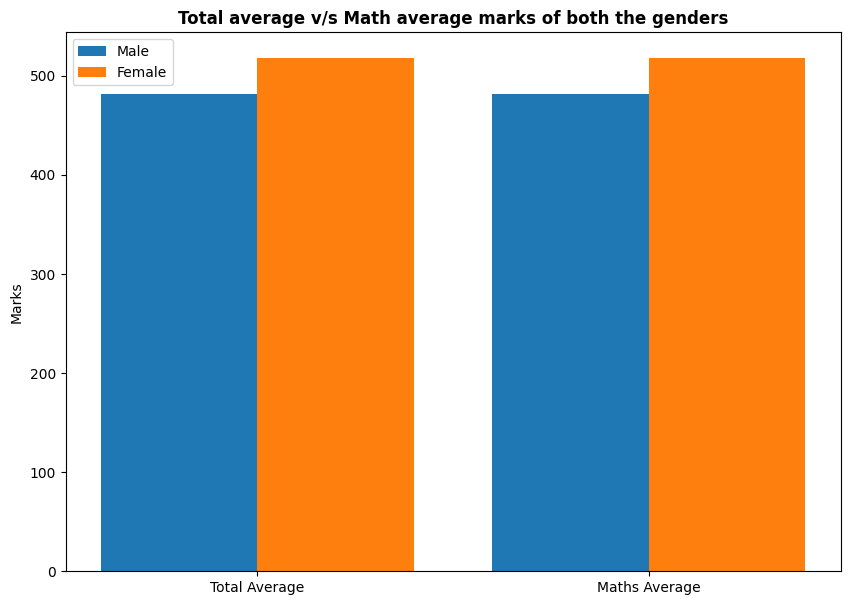

In [100]:
gender_group = df.groupby('gender').count()
plt.figure(figsize=(10,7))
X =['Total Average','Maths Average']

female_score= [gender_group['average'][0],gender_group['math_score'][0]]
male_score=[gender_group['average'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,male_score,width=0.4,label='Male')
plt.bar(X_axis+0.2, female_score,width=0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

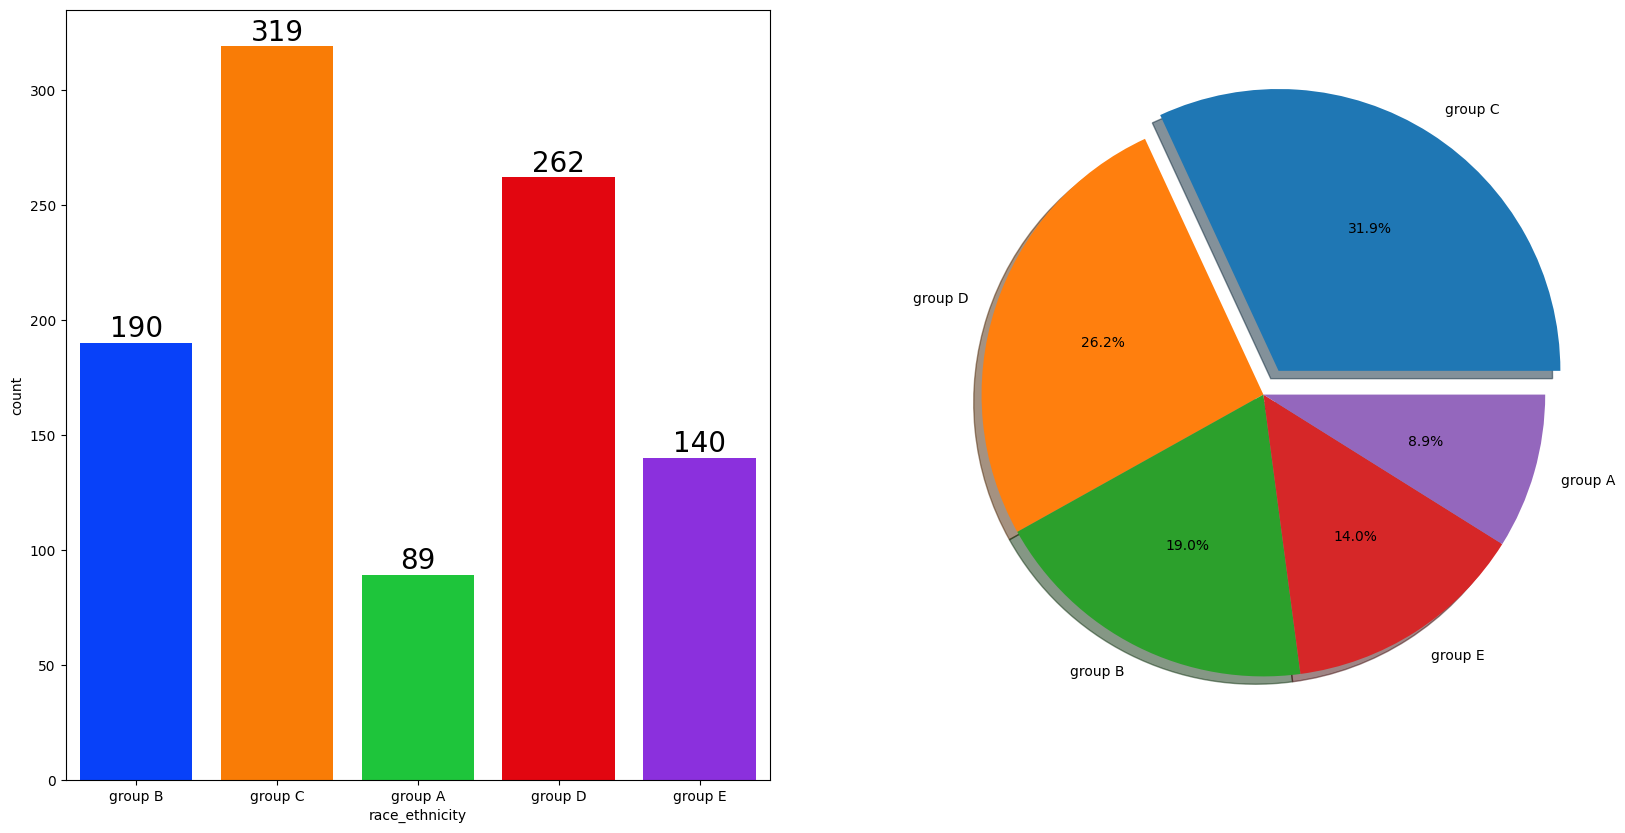

In [95]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0]\
        ,autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

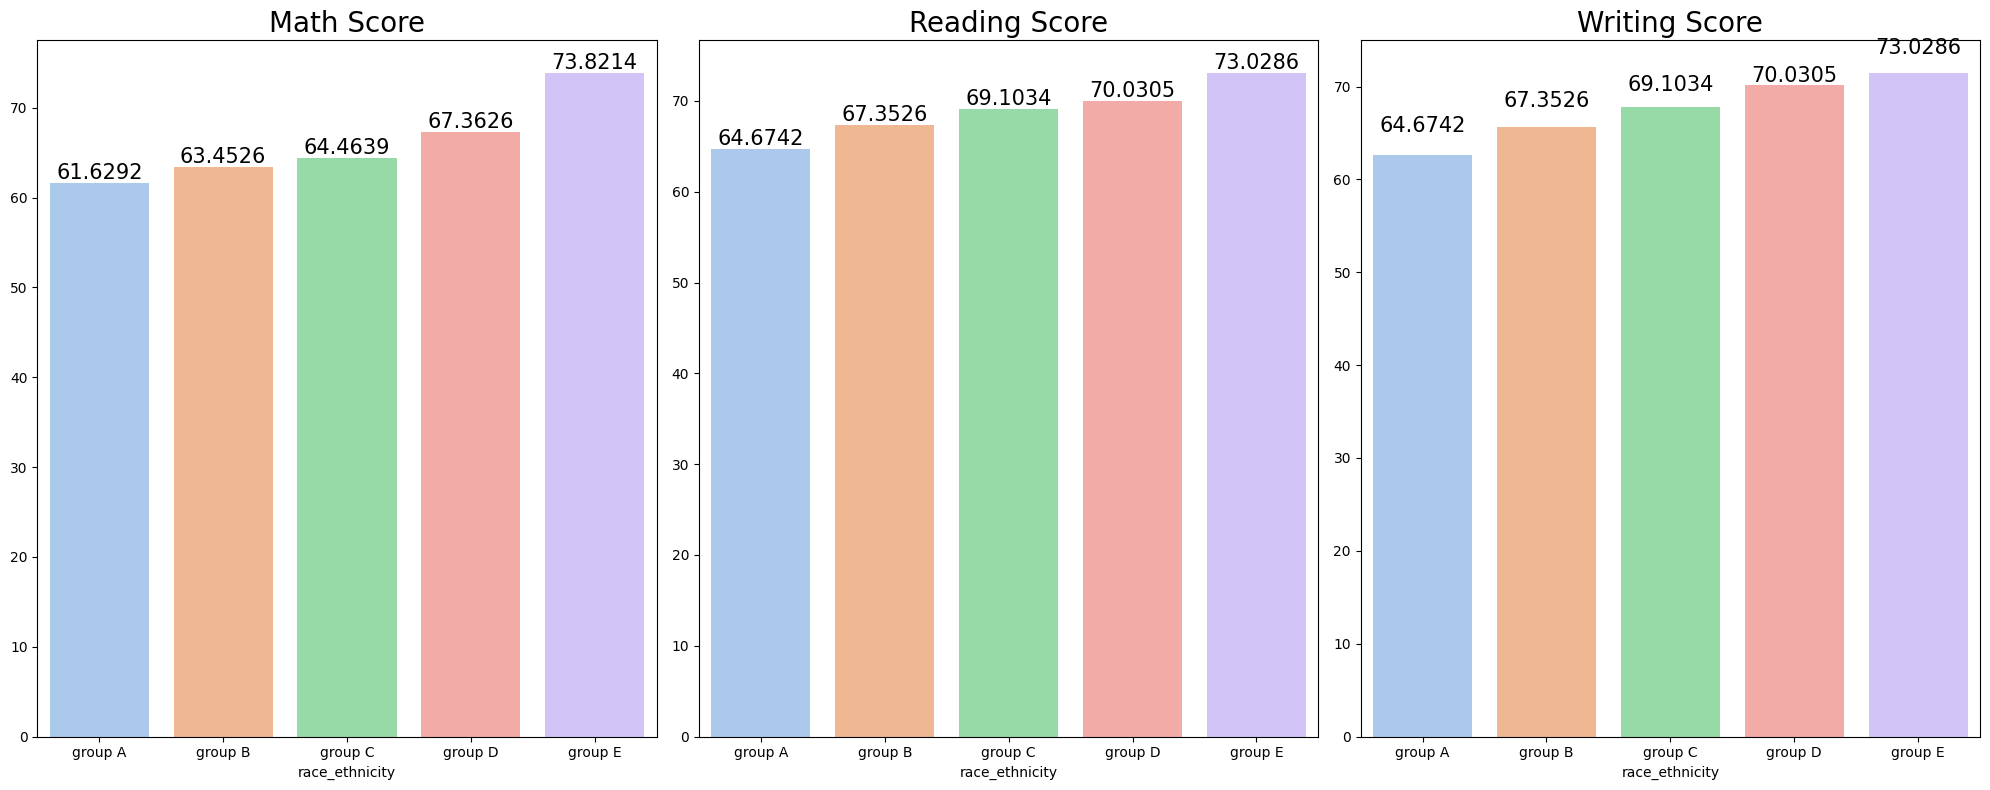

In [101]:
group_data2=df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(20,8))
#for math
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,\
            palette='pastel',ax=ax[0])
ax[0].set_title('Math Score', fontsize=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

#for reading 
sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,\
            palette='pastel',ax=ax[1])
ax[1].set_title('Reading Score', fontsize=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

#for writing 
sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,\
            palette='pastel',ax=ax[2])
ax[2].set_title('Writing Score', fontsize=20)

for container in ax[1].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

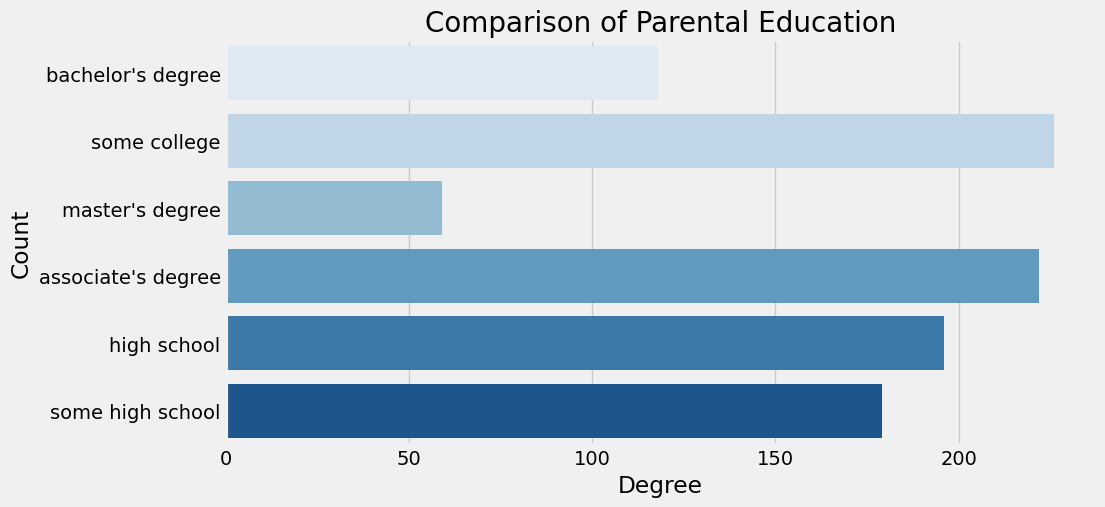

In [103]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
# Show the plot
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

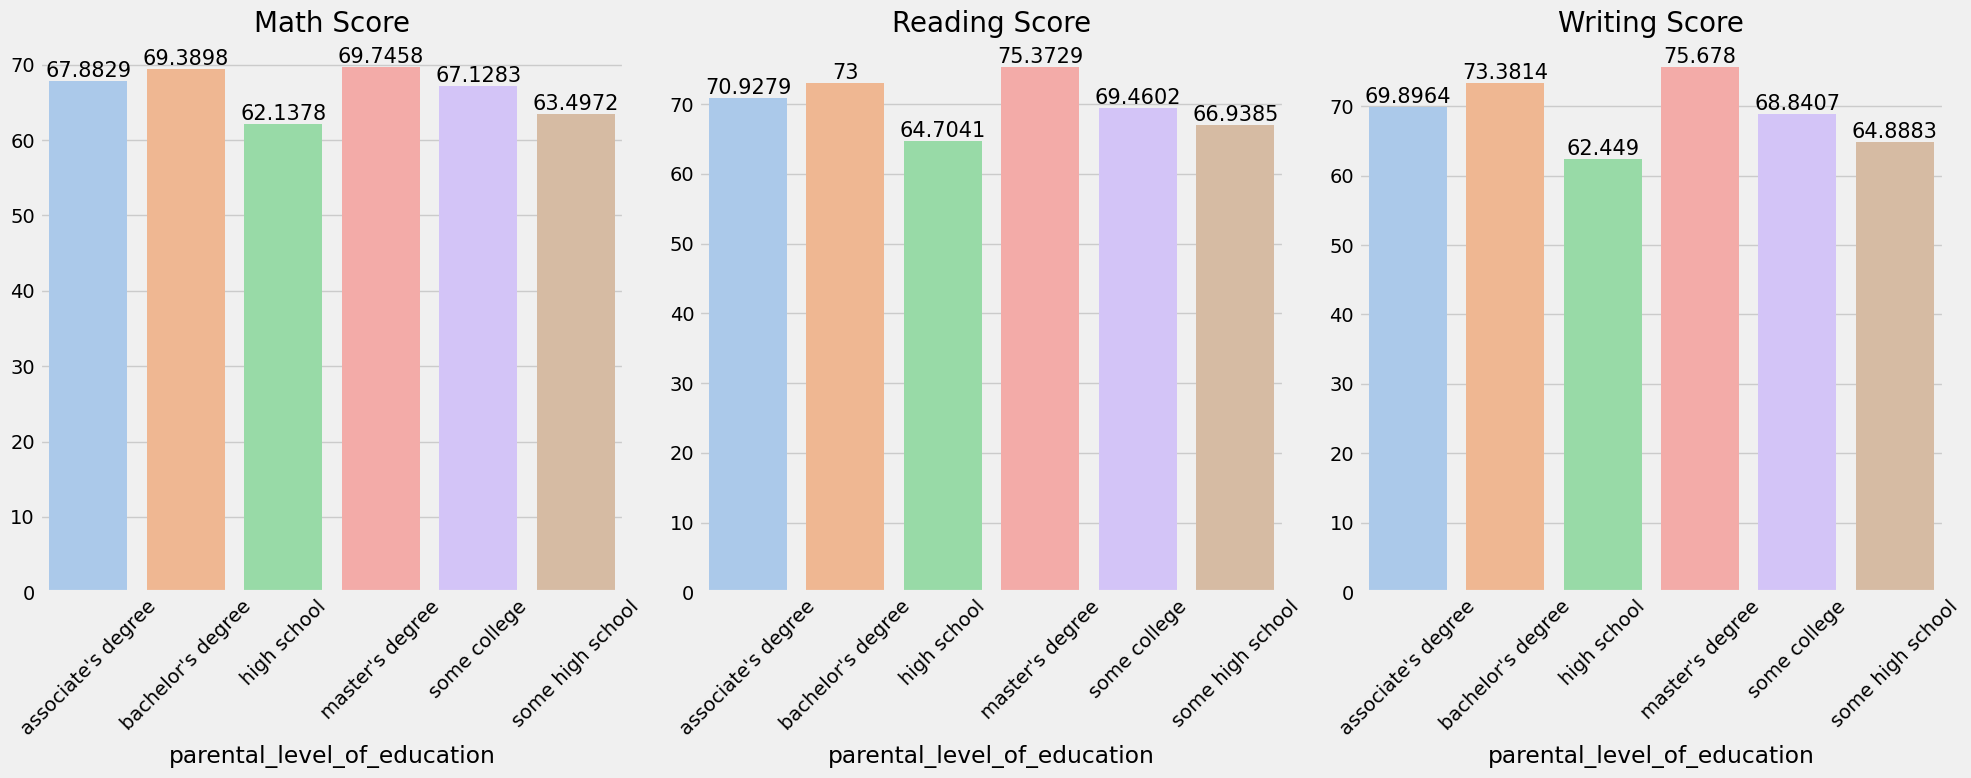

In [107]:
# Group data by 'parental_level_of_education'
group_data3 = df.groupby('parental_level_of_education')
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# For math scores
math_means = group_data3['math_score'].mean()
sns.barplot(x=math_means.index, y=math_means.values, palette='pastel', ax=ax[0])
ax[0].set_title('Math Score', fontsize=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  # Rotate labels

# Label bars for math
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# For reading scores
reading_means = group_data3['reading_score'].mean()
sns.barplot(x=reading_means.index, y=reading_means.values, palette='pastel', ax=ax[1])
ax[1].set_title('Reading Score', fontsize=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)  # Rotate labels

# Label bars for reading
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# For writing scores
writing_means = group_data3['writing_score'].mean()
sns.barplot(x=writing_means.index, y=writing_means.values, palette='pastel', ax=ax[2])
ax[2].set_title('Writing Score', fontsize=20)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)  # Rotate labels

# Label bars for writing
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.
- Significant score disparities exist between students whose parents have a master's degree and those with some high school education.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

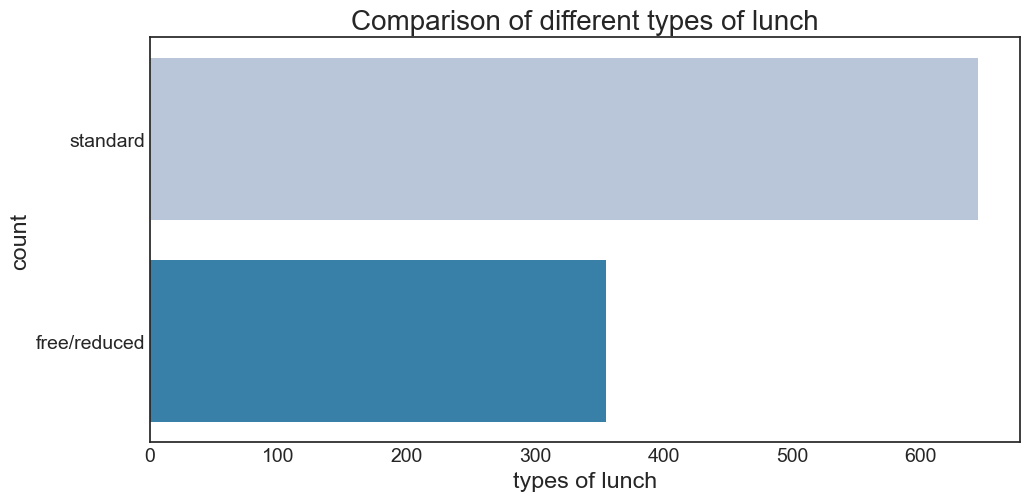

In [110]:
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-v0_8-white')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

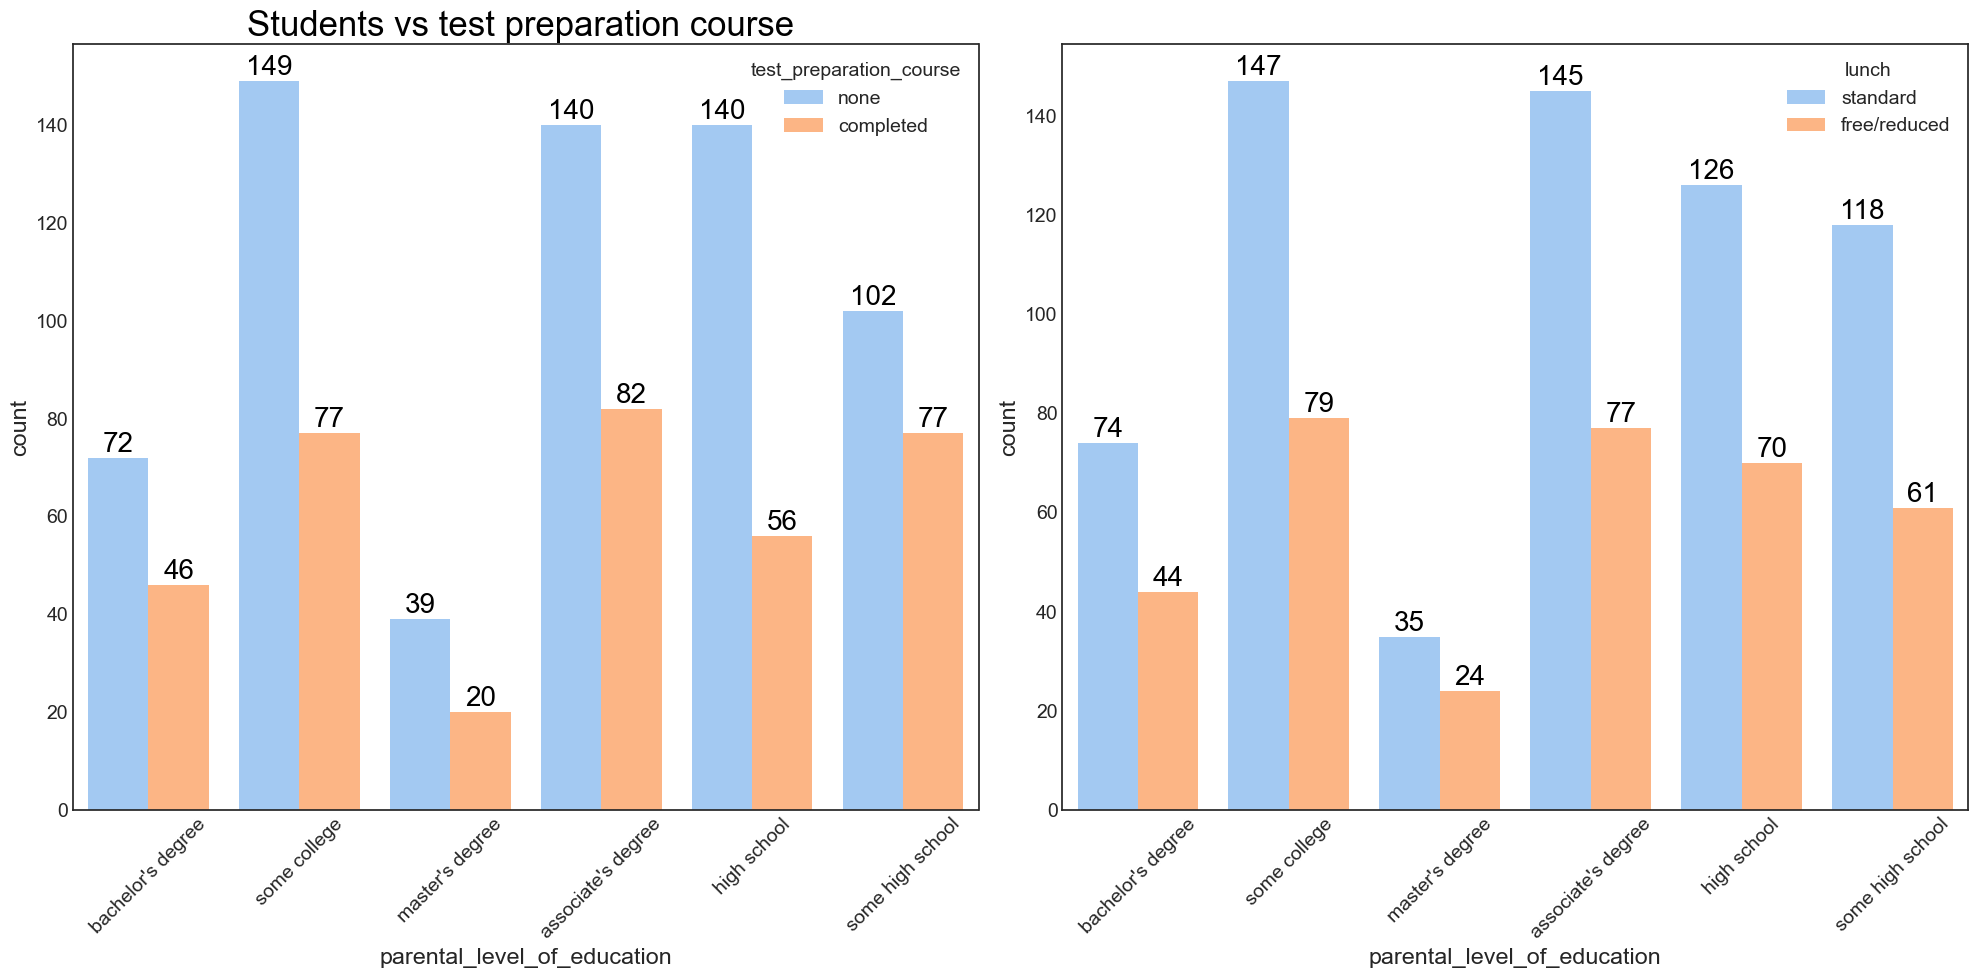

In [116]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(data= df,x=df['parental_level_of_education'],palette = 'pastel'\
              ,hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  # Rotate labels


#Label for bars
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
   
    
sns.countplot(data=df,x=df['parental_level_of_education'],palette = 'pastel',\
              hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)  # Rotate labels

#Label for bars
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

plt.tight_layout()
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

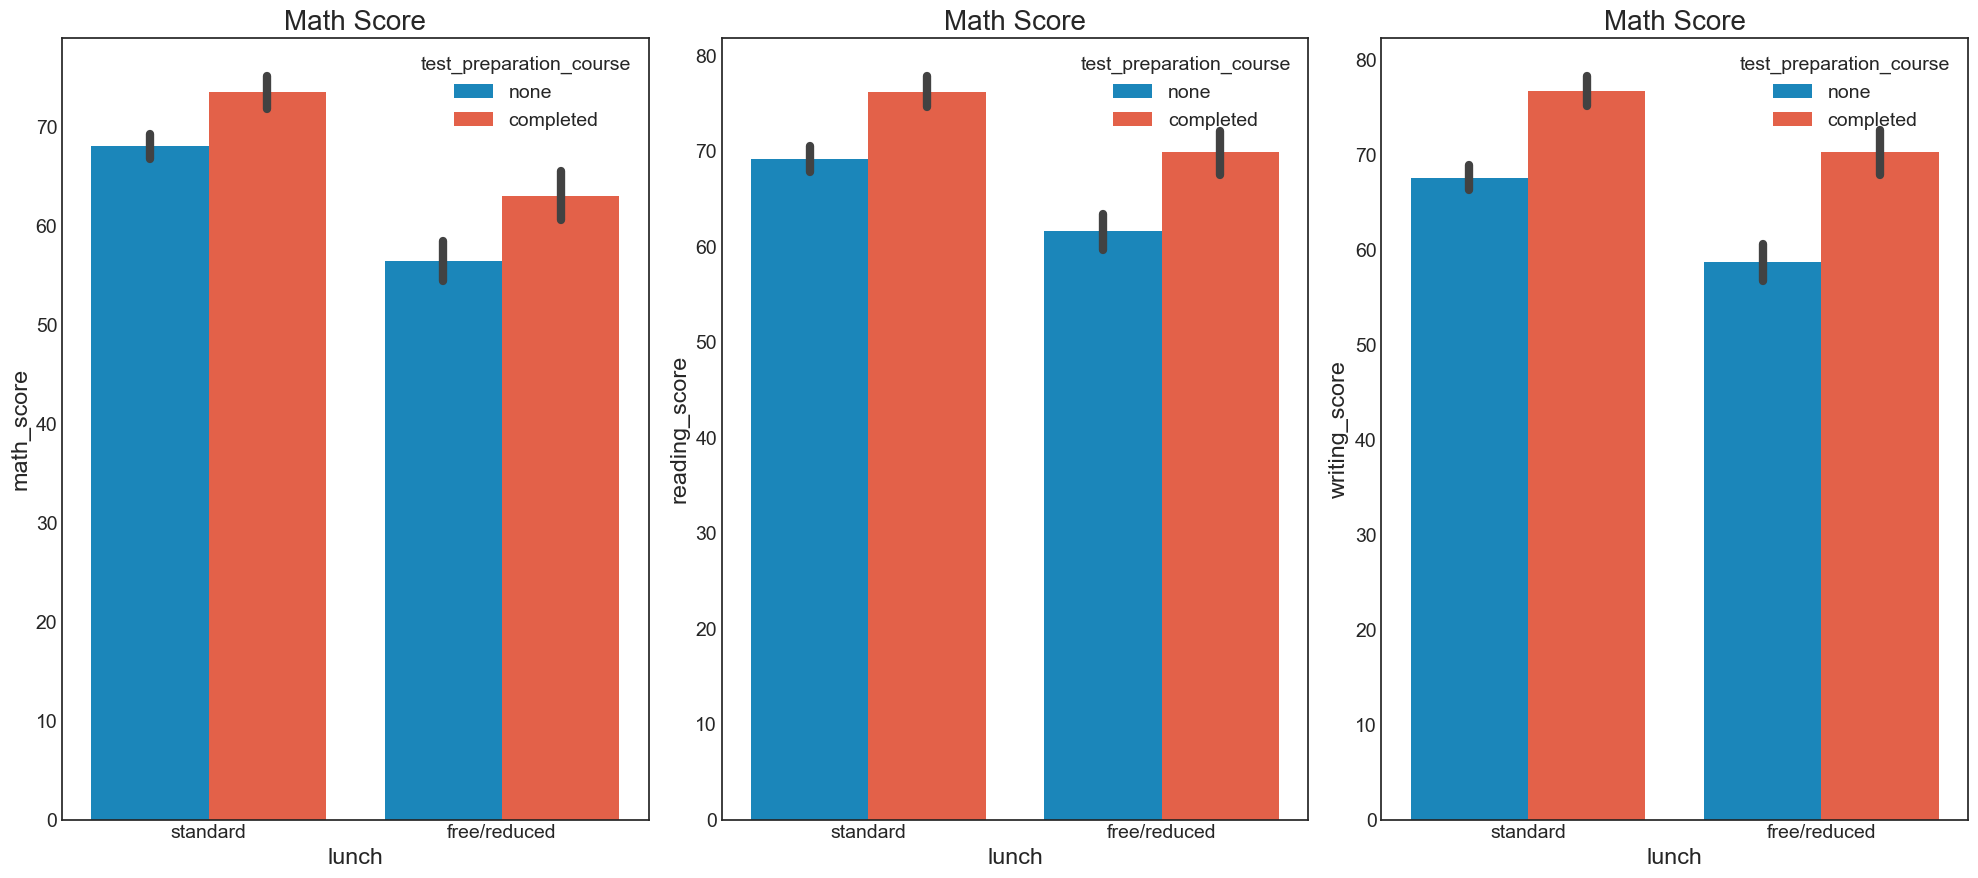

In [121]:
# Corrected subplot setup with figure size
fig, ax = plt.subplots(1, 3, figsize=(20, 9))  # This should be outside the parentheses of subplots

#for math score
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, ax=ax[0])
ax[0].set_title('Math Score', fontsize=20)
ax[0].legend(title='test_preparation_course', loc='upper right')

#for reading score
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, ax=ax[1])
ax[1].set_title('Math Score', fontsize=20)
ax[1].legend(title='test_preparation_course', loc='upper right')

#for writing score
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, ax=ax[2])
ax[2].set_title('Math Score', fontsize=20)
ax[2].legend(title='test_preparation_course', loc='upper right')
plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

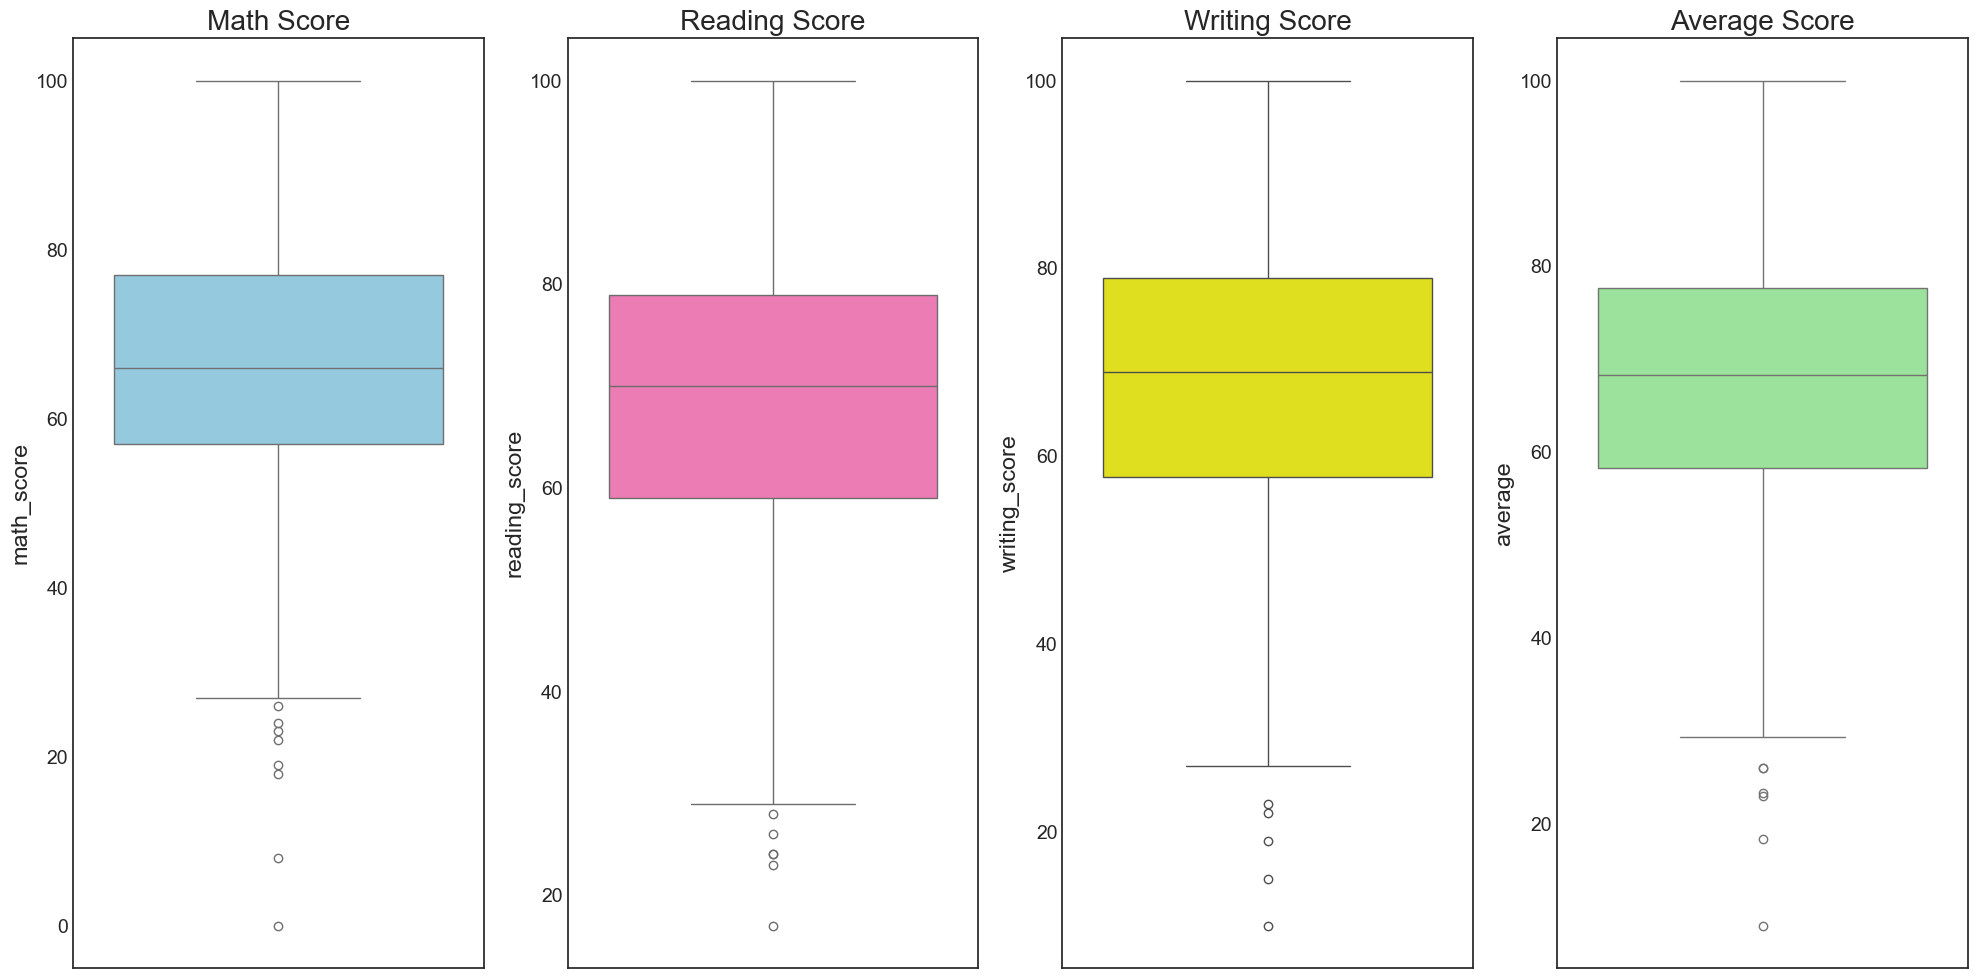

In [124]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

sns.boxplot(data=df, y='math_score', color='skyblue', ax=ax[0], orient='h')
ax[0].set_title('Math Score')

sns.boxplot(data=df, y='reading_score', color='hotpink', ax=ax[1], orient='h')
ax[1].set_title('Reading Score')

sns.boxplot(data=df, y='writing_score', color='yellow', ax=ax[2], orient='h')
ax[2].set_title('Writing Score')

sns.boxplot(data=df, y='average', color='lightgreen', ax=ax[3], orient='h')
ax[3].set_title('Average Score')

plt.tight_layout()
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

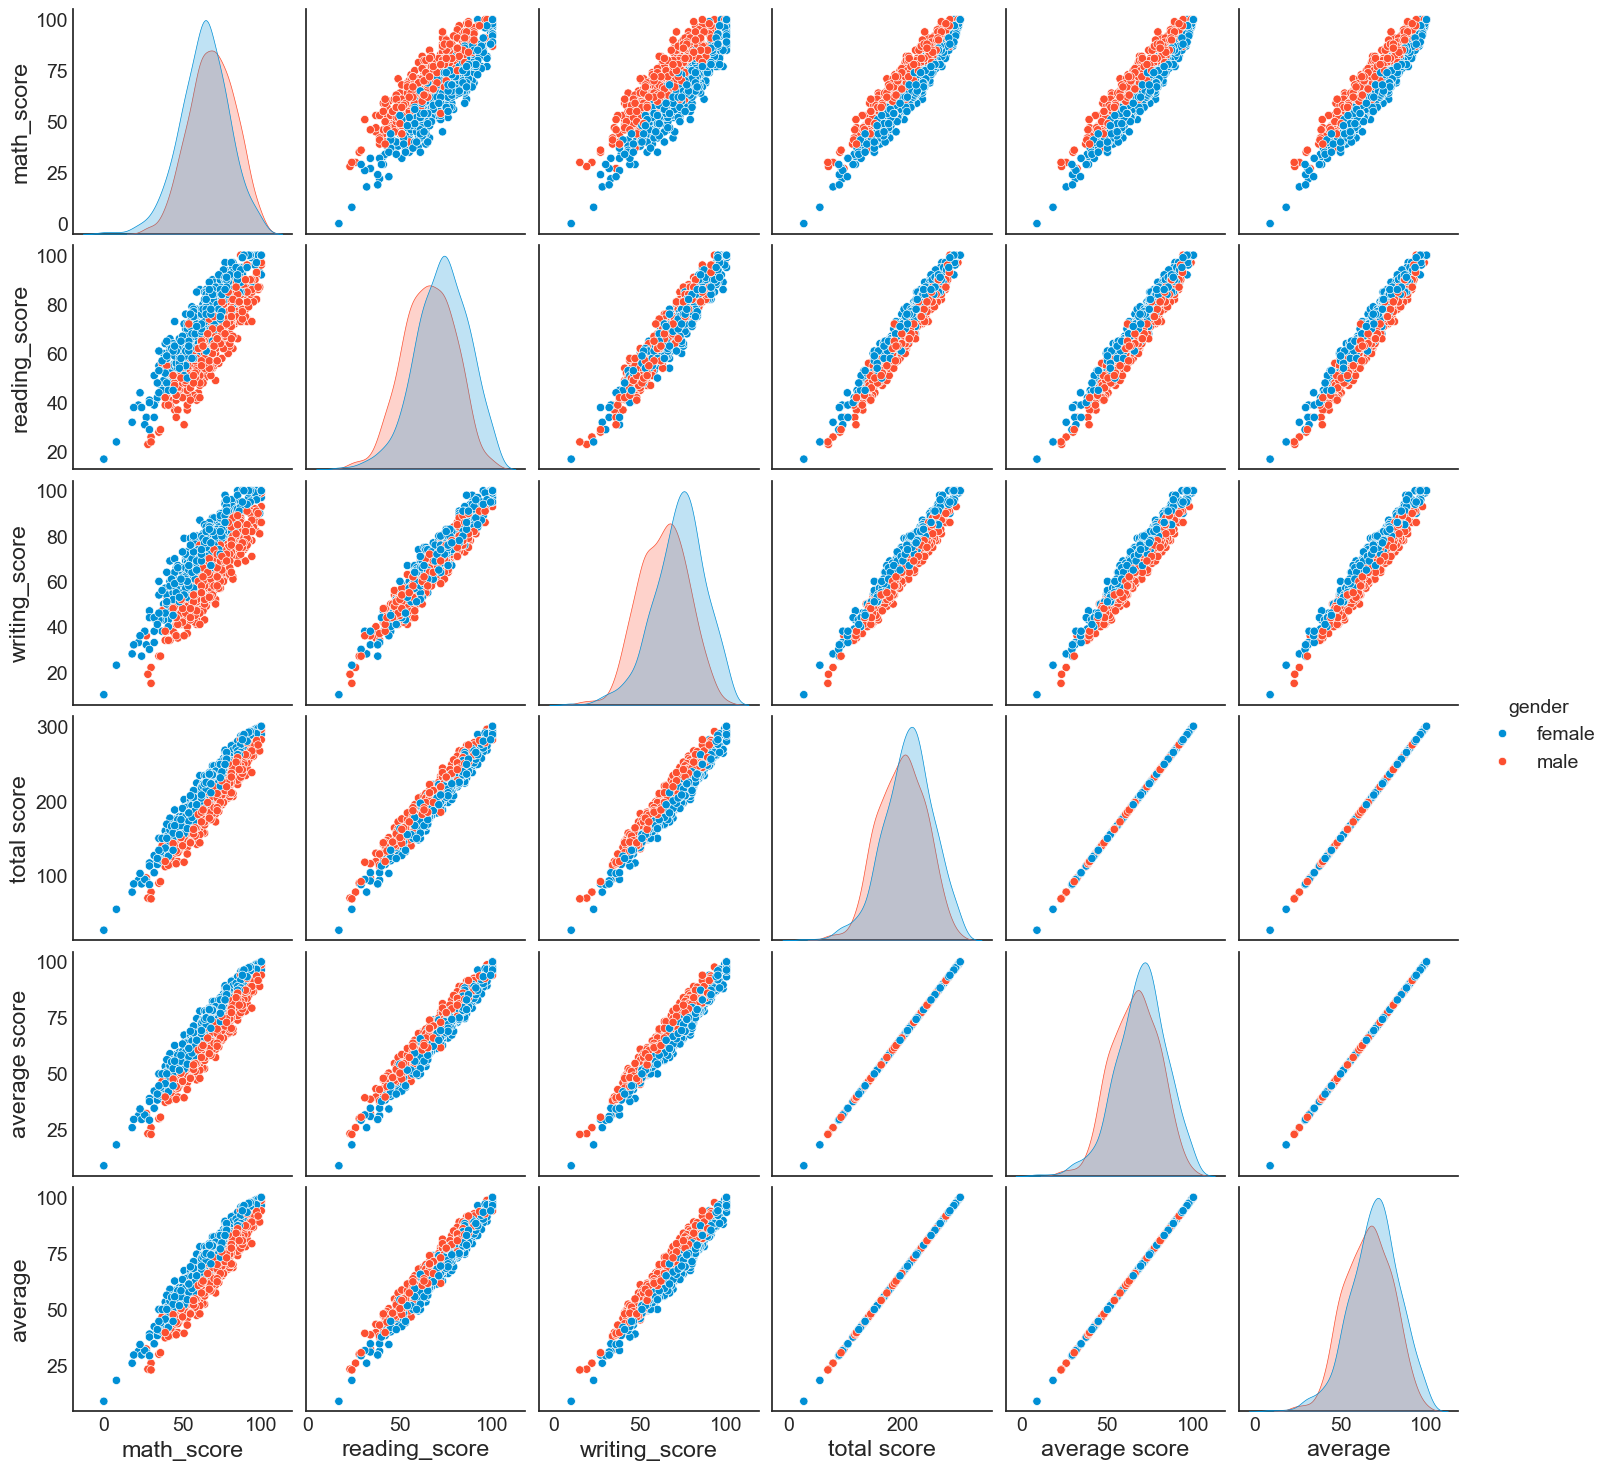

In [125]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.